In [1]:
#General imports
import Degeneration as DegGen
import matplotlib.pyplot as plt
import ImageHelper as ImgHelper

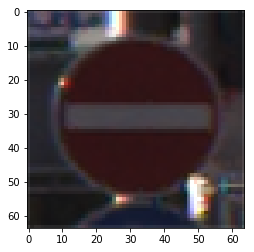

In [2]:
#Load resource - resource folder with ppm images is needed in Medusa folder
img = ImgHelper.load_ppm_image("resources/00001_00027.ppm")
plt.imshow(img)
plt.show()

Aphrodite predicts the image belongs to class:  17


C:\Users\Flo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


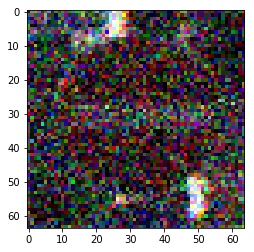

In [20]:
#Local Degeneration 
import AphroditeTraining as ApTrain
from scipy import misc as scipyMisc
import numpy as np

# Load model - Trained model is needed in Medusa folder
aphrodite = ApTrain.load_model('Aphrodite.h5')
#Load resource - resource folder with ppm images is needed in Medusa folder
img = ImgHelper.load_ppm_image("resources/00001_00027.ppm")

#In case of unexpected behavior check, if class of aphrodite.predict(img) matches the class of your image with LabelDictionary
imgClass = np.where(aphrodite.predict(np.expand_dims(img,0))[0] == 1)[0][0]
print("Aphrodite predicts the image belongs to class: ", imgClass)

ans = DegGen.degenerate(aphrodite, img, imgClass, DegGen._noise, iterations=1000, maxloops=5000)
scipyMisc.imsave("resources/localDegenerated.png",ans[1])
plt.imshow(ans[1])

StartConfidence: 0.98910248
Score: 0.94459051 Depth: 0 Loop: 1
Score: 0.94459051 Depth: 0 Loop: 2
Score: 0.94459051 Depth: 0 Loop: 3
Score: 0.94459051 Depth: 0 Loop: 4
Score: 0.94459051 Depth: 0 Loop: 5
Score: 0.94459051 Depth: 0 Loop: 6
Score: 0.94459051 Depth: 0 Loop: 7
Score: 0.94459051 Depth: 0 Loop: 8
Score: 0.94459051 Depth: 0 Loop: 9
Score: 0.94459051 Depth: 0 Loop: 10
Score: 0.94459051 Depth: 0 Loop: 11
Score: 0.94459051 Depth: 0 Loop: 12
Score: 0.94459051 Depth: 0 Loop: 13
Score: 0.94459051 Depth: 0 Loop: 14
Score: 0.94459051 Depth: 0 Loop: 15
Score: 0.94459051 Depth: 0 Loop: 16
Score: 0.94459051 Depth: 0 Loop: 17
Score: 0.94459051 Depth: 0 Loop: 18
Score: 0.94459051 Depth: 0 Loop: 19
Score: 0.94459051 Depth: 0 Loop: 20
Score: 0.94459051 Depth: 0 Loop: 21
Score: 0.94459051 Depth: 0 Loop: 22
Score: 0.94459051 Depth: 0 Loop: 23
Score: 0.94459051 Depth: 0 Loop: 24
Score: 0.94459051 Depth: 0 Loop: 25
Score: 0.94459051 Depth: 0 Loop: 26
Score: 0.94459051 Depth: 0 Loop: 27
Score: 0.

Score: 0.94459051 Depth: 0 Loop: 225
Score: 0.94459051 Depth: 0 Loop: 226
Score: 0.94459051 Depth: 0 Loop: 227
Score: 0.94459051 Depth: 0 Loop: 228
Score: 0.94459051 Depth: 0 Loop: 229
Score: 0.94459051 Depth: 0 Loop: 230
Score: 0.94459051 Depth: 0 Loop: 231
Score: 0.94459051 Depth: 0 Loop: 232
Score: 0.94459051 Depth: 0 Loop: 233
Score: 0.94459051 Depth: 0 Loop: 234
Score: 0.94459051 Depth: 0 Loop: 235
Score: 0.94459051 Depth: 0 Loop: 236
Score: 0.94459051 Depth: 0 Loop: 237
Score: 0.94459051 Depth: 0 Loop: 238
Score: 0.94459051 Depth: 0 Loop: 239
Score: 0.94459051 Depth: 0 Loop: 240
Score: 0.94459051 Depth: 0 Loop: 241
Score: 0.94459051 Depth: 0 Loop: 242
Score: 0.94459051 Depth: 0 Loop: 243
Score: 0.94459051 Depth: 0 Loop: 244
Score: 0.94459051 Depth: 0 Loop: 245
Score: 0.94459051 Depth: 0 Loop: 246
Score: 0.94459051 Depth: 0 Loop: 247
Score: 0.94459051 Depth: 0 Loop: 248
Score: 0.94459051 Depth: 0 Loop: 249
Score: 0.94459051 Depth: 0 Loop: 250
Score: 0.94459051 Depth: 0 Loop: 251
S

Score: 0.94459051 Depth: 0 Loop: 447
Score: 0.94459051 Depth: 0 Loop: 448
Score: 0.94459051 Depth: 0 Loop: 449
Score: 0.94459051 Depth: 0 Loop: 450
Score: 0.94459051 Depth: 0 Loop: 451
Score: 0.94459051 Depth: 0 Loop: 452
Score: 0.94459051 Depth: 0 Loop: 453
Score: 0.94459051 Depth: 0 Loop: 454
Score: 0.94459051 Depth: 0 Loop: 455
Score: 0.94459051 Depth: 0 Loop: 456
Score: 0.94459051 Depth: 0 Loop: 457
Score: 0.94459051 Depth: 0 Loop: 458
Score: 0.94459051 Depth: 0 Loop: 459
Score: 0.94459051 Depth: 0 Loop: 460
Score: 0.94459051 Depth: 0 Loop: 461
Score: 0.94459051 Depth: 0 Loop: 462
Score: 0.94459051 Depth: 0 Loop: 463
Score: 0.94459051 Depth: 0 Loop: 464
Score: 0.94459051 Depth: 0 Loop: 465
Score: 0.94459051 Depth: 0 Loop: 466
Score: 0.94459051 Depth: 0 Loop: 467
Score: 0.94459051 Depth: 0 Loop: 468
Score: 0.94459051 Depth: 0 Loop: 469
Score: 0.94459051 Depth: 0 Loop: 470
Score: 0.94459051 Depth: 0 Loop: 471
Score: 0.94459051 Depth: 0 Loop: 472
Score: 0.94459051 Depth: 0 Loop: 473
S

Score: 0.94459051 Depth: 0 Loop: 669
Score: 0.94459051 Depth: 0 Loop: 670
Score: 0.94459051 Depth: 0 Loop: 671
Score: 0.94459051 Depth: 0 Loop: 672
Score: 0.94459051 Depth: 0 Loop: 673
Score: 0.94459051 Depth: 0 Loop: 674
Score: 0.94459051 Depth: 0 Loop: 675
Score: 0.94459051 Depth: 0 Loop: 676
Score: 0.94459051 Depth: 0 Loop: 677
Score: 0.94459051 Depth: 0 Loop: 678
Score: 0.94459051 Depth: 0 Loop: 679
Score: 0.94459051 Depth: 0 Loop: 680
Score: 0.94459051 Depth: 0 Loop: 681
Score: 0.94459051 Depth: 0 Loop: 682
Score: 0.94459051 Depth: 0 Loop: 683
Score: 0.94459051 Depth: 0 Loop: 684
Score: 0.94459051 Depth: 0 Loop: 685
Score: 0.94459051 Depth: 0 Loop: 686
Score: 0.94459051 Depth: 0 Loop: 687
Score: 0.94459051 Depth: 0 Loop: 688
Score: 0.94459051 Depth: 0 Loop: 689
Score: 0.94459051 Depth: 0 Loop: 690
Score: 0.94459051 Depth: 0 Loop: 691
Score: 0.94459051 Depth: 0 Loop: 692
Score: 0.94459051 Depth: 0 Loop: 693
Score: 0.94459051 Depth: 0 Loop: 694
Score: 0.94459051 Depth: 0 Loop: 695
S

Score: 0.94459051 Depth: 0 Loop: 891
Score: 0.94459051 Depth: 0 Loop: 892
Score: 0.94459051 Depth: 0 Loop: 893
Score: 0.94459051 Depth: 0 Loop: 894
Score: 0.94459051 Depth: 0 Loop: 895
Score: 0.94459051 Depth: 0 Loop: 896
Score: 0.94459051 Depth: 0 Loop: 897
Score: 0.94459051 Depth: 0 Loop: 898
Score: 0.94459051 Depth: 0 Loop: 899
Score: 0.94459051 Depth: 0 Loop: 900
Score: 0.94459051 Depth: 0 Loop: 901
Score: 0.94459051 Depth: 0 Loop: 902
Score: 0.94459051 Depth: 0 Loop: 903
Score: 0.94459051 Depth: 0 Loop: 904
Score: 0.94459051 Depth: 0 Loop: 905
Score: 0.94459051 Depth: 0 Loop: 906
Score: 0.94459051 Depth: 0 Loop: 907
Score: 0.94459051 Depth: 0 Loop: 908
Score: 0.94459051 Depth: 0 Loop: 909
Score: 0.94459051 Depth: 0 Loop: 910
Score: 0.94459051 Depth: 0 Loop: 911
Score: 0.94459051 Depth: 0 Loop: 912
Score: 0.94459051 Depth: 0 Loop: 913
Score: 0.94459051 Depth: 0 Loop: 914
Score: 0.94459051 Depth: 0 Loop: 915
Score: 0.94459051 Depth: 0 Loop: 916
Score: 0.94459051 Depth: 0 Loop: 917
S

Score: 0.94459051 Depth: 0 Loop: 1110
Score: 0.94459051 Depth: 0 Loop: 1111
Score: 0.94459051 Depth: 0 Loop: 1112
Score: 0.94459051 Depth: 0 Loop: 1113
Score: 0.94459051 Depth: 0 Loop: 1114
Score: 0.94459051 Depth: 0 Loop: 1115
Score: 0.94459051 Depth: 0 Loop: 1116
Score: 0.94459051 Depth: 0 Loop: 1117
Score: 0.94459051 Depth: 0 Loop: 1118
Score: 0.94459051 Depth: 0 Loop: 1119
Score: 0.94459051 Depth: 0 Loop: 1120
Score: 0.94459051 Depth: 0 Loop: 1121
Score: 0.94459051 Depth: 0 Loop: 1122
Score: 0.94459051 Depth: 0 Loop: 1123
Score: 0.94459051 Depth: 0 Loop: 1124
Score: 0.94459051 Depth: 0 Loop: 1125
Score: 0.94459051 Depth: 0 Loop: 1126
Score: 0.94459051 Depth: 0 Loop: 1127
Score: 0.94459051 Depth: 0 Loop: 1128
Score: 0.94459051 Depth: 0 Loop: 1129
Score: 0.94459051 Depth: 0 Loop: 1130
Score: 0.94459051 Depth: 0 Loop: 1131
Score: 0.94459051 Depth: 0 Loop: 1132
Score: 0.94459051 Depth: 0 Loop: 1133
Score: 0.94459051 Depth: 0 Loop: 1134
Score: 0.94459051 Depth: 0 Loop: 1135
Score: 0.944

Score: 0.94459051 Depth: 0 Loop: 1326
Score: 0.94459051 Depth: 0 Loop: 1327
Score: 0.94459051 Depth: 0 Loop: 1328
Score: 0.94459051 Depth: 0 Loop: 1329
Score: 0.94459051 Depth: 0 Loop: 1330
Score: 0.94459051 Depth: 0 Loop: 1331
Score: 0.94459051 Depth: 0 Loop: 1332
Score: 0.94459051 Depth: 0 Loop: 1333
Score: 0.94459051 Depth: 0 Loop: 1334
Score: 0.94459051 Depth: 0 Loop: 1335
Score: 0.94459051 Depth: 0 Loop: 1336
Score: 0.94459051 Depth: 0 Loop: 1337
Score: 0.94459051 Depth: 0 Loop: 1338
Score: 0.94459051 Depth: 0 Loop: 1339
Score: 0.94459051 Depth: 0 Loop: 1340
Score: 0.94459051 Depth: 0 Loop: 1341
Score: 0.94459051 Depth: 0 Loop: 1342
Score: 0.94459051 Depth: 0 Loop: 1343
Score: 0.94459051 Depth: 0 Loop: 1344
Score: 0.94459051 Depth: 0 Loop: 1345
Score: 0.94459051 Depth: 0 Loop: 1346
Score: 0.94459051 Depth: 0 Loop: 1347
Score: 0.94459051 Depth: 0 Loop: 1348
Score: 0.94459051 Depth: 0 Loop: 1349
Score: 0.94459051 Depth: 0 Loop: 1350
Score: 0.94459051 Depth: 0 Loop: 1351
Score: 0.944

Score: 0.94459051 Depth: 0 Loop: 1542
Score: 0.94459051 Depth: 0 Loop: 1543
Score: 0.94459051 Depth: 0 Loop: 1544
Score: 0.94459051 Depth: 0 Loop: 1545
Score: 0.94459051 Depth: 0 Loop: 1546
Score: 0.94459051 Depth: 0 Loop: 1547
Score: 0.94459051 Depth: 0 Loop: 1548
Score: 0.94459051 Depth: 0 Loop: 1549
Score: 0.94459051 Depth: 0 Loop: 1550
Score: 0.94459051 Depth: 0 Loop: 1551
Score: 0.94459051 Depth: 0 Loop: 1552
Score: 0.94459051 Depth: 0 Loop: 1553
Score: 0.94459051 Depth: 0 Loop: 1554
Score: 0.94459051 Depth: 0 Loop: 1555
Score: 0.94459051 Depth: 0 Loop: 1556
Score: 0.94459051 Depth: 0 Loop: 1557
Score: 0.94459051 Depth: 0 Loop: 1558
Score: 0.94459051 Depth: 0 Loop: 1559
Score: 0.94459051 Depth: 0 Loop: 1560
Score: 0.94459051 Depth: 0 Loop: 1561
Score: 0.94459051 Depth: 0 Loop: 1562
Score: 0.94459051 Depth: 0 Loop: 1563
Score: 0.94459051 Depth: 0 Loop: 1564
Score: 0.94459051 Depth: 0 Loop: 1565
Score: 0.94459051 Depth: 0 Loop: 1566
Score: 0.94459051 Depth: 0 Loop: 1567
Score: 0.944

Score: 0.94459051 Depth: 0 Loop: 1758
Score: 0.94459051 Depth: 0 Loop: 1759
Score: 0.94459051 Depth: 0 Loop: 1760
Score: 0.94459051 Depth: 0 Loop: 1761
Score: 0.94459051 Depth: 0 Loop: 1762
Score: 0.94459051 Depth: 0 Loop: 1763
Score: 0.94459051 Depth: 0 Loop: 1764
Score: 0.94459051 Depth: 0 Loop: 1765
Score: 0.94459051 Depth: 0 Loop: 1766
Score: 0.94459051 Depth: 0 Loop: 1767
Score: 0.94459051 Depth: 0 Loop: 1768
Score: 0.94459051 Depth: 0 Loop: 1769
Score: 0.94459051 Depth: 0 Loop: 1770
Score: 0.94459051 Depth: 0 Loop: 1771
Score: 0.94459051 Depth: 0 Loop: 1772
Score: 0.94459051 Depth: 0 Loop: 1773
Score: 0.94459051 Depth: 0 Loop: 1774
Score: 0.94459051 Depth: 0 Loop: 1775
Score: 0.94459051 Depth: 0 Loop: 1776
Score: 0.94459051 Depth: 0 Loop: 1777
Score: 0.94459051 Depth: 0 Loop: 1778
Score: 0.94459051 Depth: 0 Loop: 1779
Score: 0.94459051 Depth: 0 Loop: 1780
Score: 0.94459051 Depth: 0 Loop: 1781
Score: 0.94459051 Depth: 0 Loop: 1782
Score: 0.94459051 Depth: 0 Loop: 1783
Score: 0.944

Score: 0.94459051 Depth: 0 Loop: 1974
Score: 0.94459051 Depth: 0 Loop: 1975
Score: 0.94459051 Depth: 0 Loop: 1976
Score: 0.94459051 Depth: 0 Loop: 1977
Score: 0.94459051 Depth: 0 Loop: 1978
Score: 0.94459051 Depth: 0 Loop: 1979
Score: 0.94459051 Depth: 0 Loop: 1980
Score: 0.94459051 Depth: 0 Loop: 1981
Score: 0.94459051 Depth: 0 Loop: 1982
Score: 0.94459051 Depth: 0 Loop: 1983
Score: 0.94459051 Depth: 0 Loop: 1984
Score: 0.94459051 Depth: 0 Loop: 1985
Score: 0.94459051 Depth: 0 Loop: 1986
Score: 0.94459051 Depth: 0 Loop: 1987
Score: 0.94459051 Depth: 0 Loop: 1988
Score: 0.94459051 Depth: 0 Loop: 1989
Score: 0.94459051 Depth: 0 Loop: 1990
Score: 0.94459051 Depth: 0 Loop: 1991
Score: 0.94459051 Depth: 0 Loop: 1992
Score: 0.94459051 Depth: 0 Loop: 1993
Score: 0.94459051 Depth: 0 Loop: 1994
Score: 0.94459051 Depth: 0 Loop: 1995
Score: 0.94459051 Depth: 0 Loop: 1996
Score: 0.94459051 Depth: 0 Loop: 1997
Score: 0.94459051 Depth: 0 Loop: 1998
Score: 0.94459051 Depth: 0 Loop: 1999
Score: 0.944

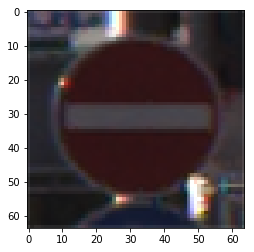

In [4]:
#Remote Degeneration

#Load resource - resource folder with ppm images is needed in Medusa folder
img = ImgHelper.load_ppm_image("resources/00001_00027.ppm")

ans = DegGen.remoteDegenerate(img, DegGen._smooth)
plt.imshow(ans[1])